# The world's top 1000 billionaires data analysis initiative.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('G:\\Project file\\Billionaires Statistics Dataset.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [3]:
df.shape

(2640, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [5]:
# Analyzing missing values in the DataFrame.
missing_values_count = df.isnull().sum()
missing_values_count

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

# A few irrelevant columns which wasn't so essential to my data analysis have been removed.


In [6]:
df = df.drop(columns=['category','countryOfCitizenship', 'organization', 'status', 'birthDate', 'lastName', 'firstName',
             'title', 'date', 'state', 'residenceStateRegion', 'birthYear','birthMonth','birthDay',
              'gross_primary_education_enrollment_country'], axis=1)
df.head()    

,rank,finalWorth,personName,age,country,city,source,industries,selfMade,gender,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,False,M,110.05,1.1,"$2,715,518,274,227",65.6,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [7]:
# Data Cleaning: Removing rows with missing Values from DataFrame.
df.dropna(inplace=True)

In [8]:
# Data Sampling: I don't use all of my DataFrame's data. Choosing the first 1000 rows from the dataframe so that i may properly analyze the data.
df = df.iloc[:1000]
df.head()

,rank,finalWorth,personName,age,country,city,source,industries,selfMade,gender,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,False,M,110.05,1.1,"$2,715,518,274,227",65.6,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,True,M,117.24,7.5,"$21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [9]:
df.shape

(1000, 20)

In [10]:
# In order to make data analysis easier, I have removed the dollar symbol from the 'gdp_country' column.
df['gdp_country']= df['gdp_country'].str.replace('$','')
df.head()

,rank,finalWorth,personName,age,country,city,source,industries,selfMade,gender,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,False,M,110.05,1.1,"2,715,518,274,227",65.6,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,True,M,117.24,7.5,"21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,True,M,117.24,7.5,"21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,True,M,117.24,7.5,"21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,True,M,117.24,7.5,"21,427,700,000,000",88.2,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Exploring Billionaires distribution across countries.

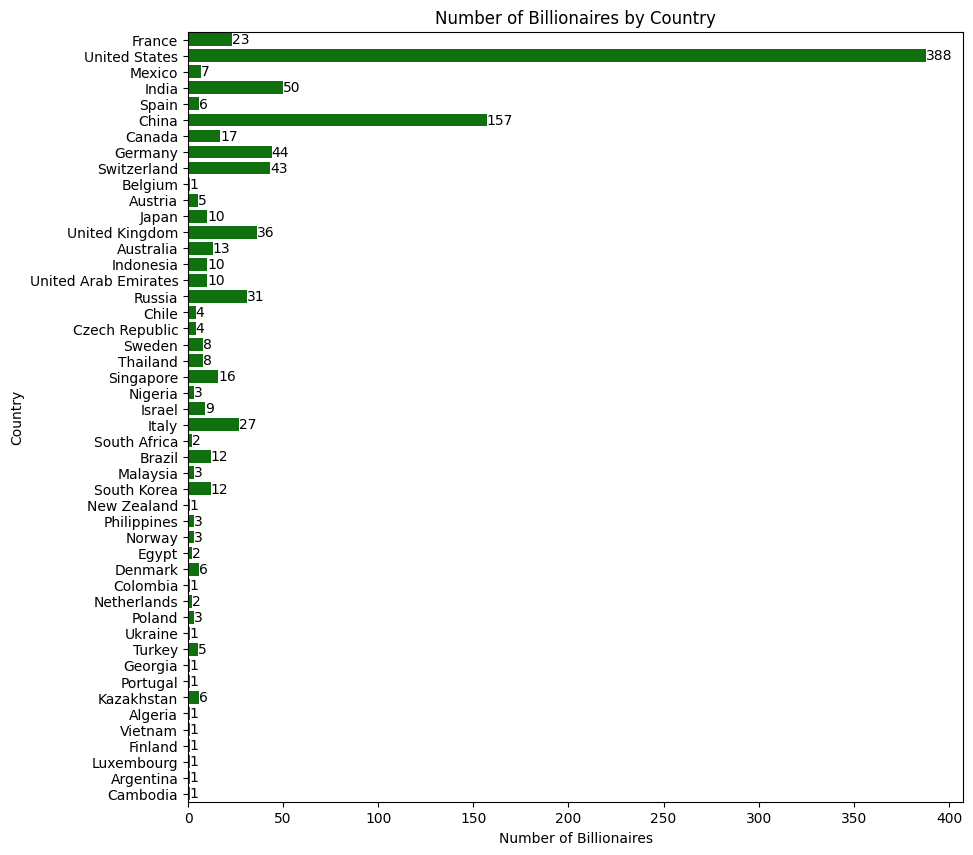

In [11]:
plt.figure(figsize=(10,10))
var = sns.countplot(y='country',data=df,color='g')
var.bar_label(var.containers [0])
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.title('Number of Billionaires by Country')
plt.show()

In [12]:
# Top 10 countries with the highest number of billionaires.
country_count = df['country'].value_counts().head(10)
country_count

country
United States     388
China             157
India              50
Germany            44
Switzerland        43
United Kingdom     36
Russia             31
Italy              27
France             23
Canada             17
Name: count, dtype: int64

# Investigating age patterns among male and female Billionaires.

<Figure size 2400x1800 with 0 Axes>

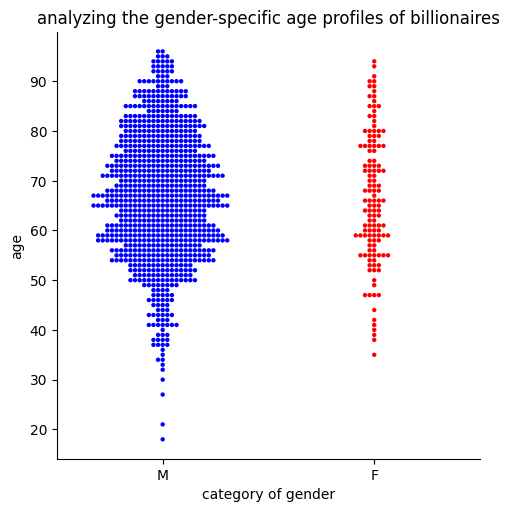

In [13]:
plt.figure(figsize=(24,18))
sns.catplot(x='gender',y='age', data=df,kind='swarm',hue='gender',palette=['blue','red'],s=10)
plt.xlabel('category of gender')
plt.ylabel('age')
plt.title('analyzing the gender-specific age profiles of billionaires')
plt.show()

# Exploring sectoral distribution among Billionaires.

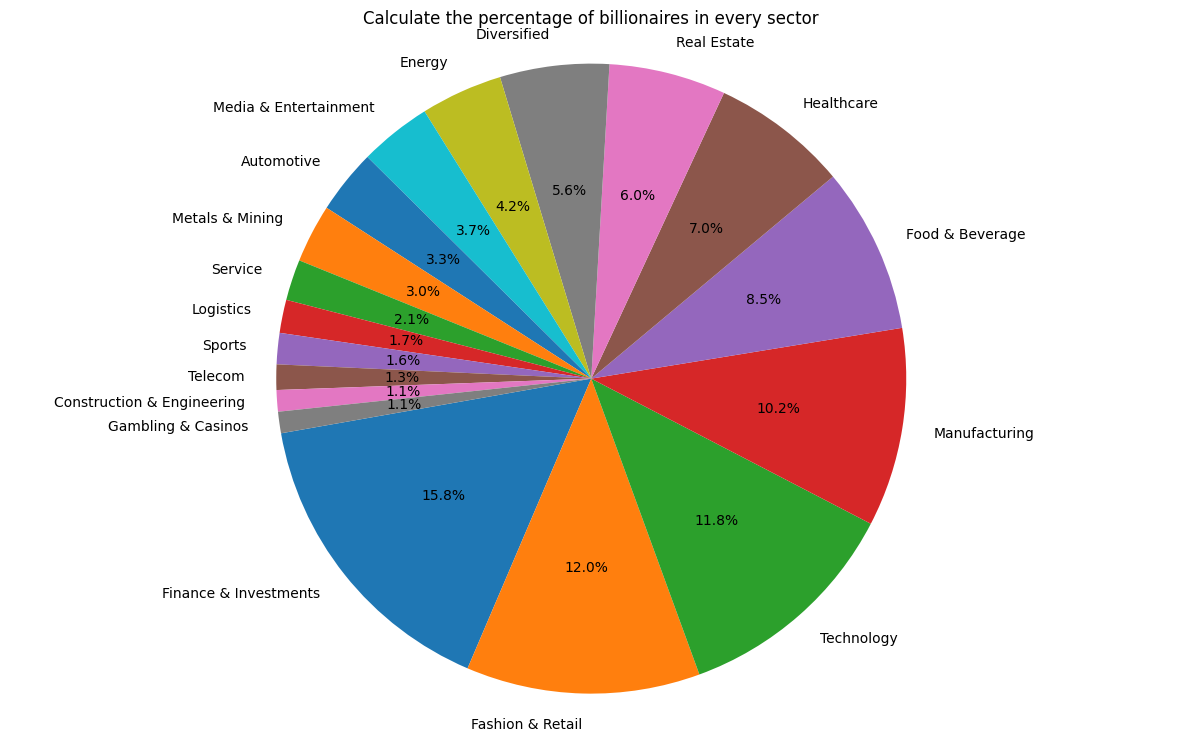

In [14]:
industry_counts = df['industries'].value_counts()
plt.figure(figsize=(15,9))
plt.pie(industry_counts, labels=industry_counts.index,autopct='%1.1f%%',startangle=190)
plt.title('Calculate the percentage of billionaires in every sector')
plt.axis('equal')
plt.show()

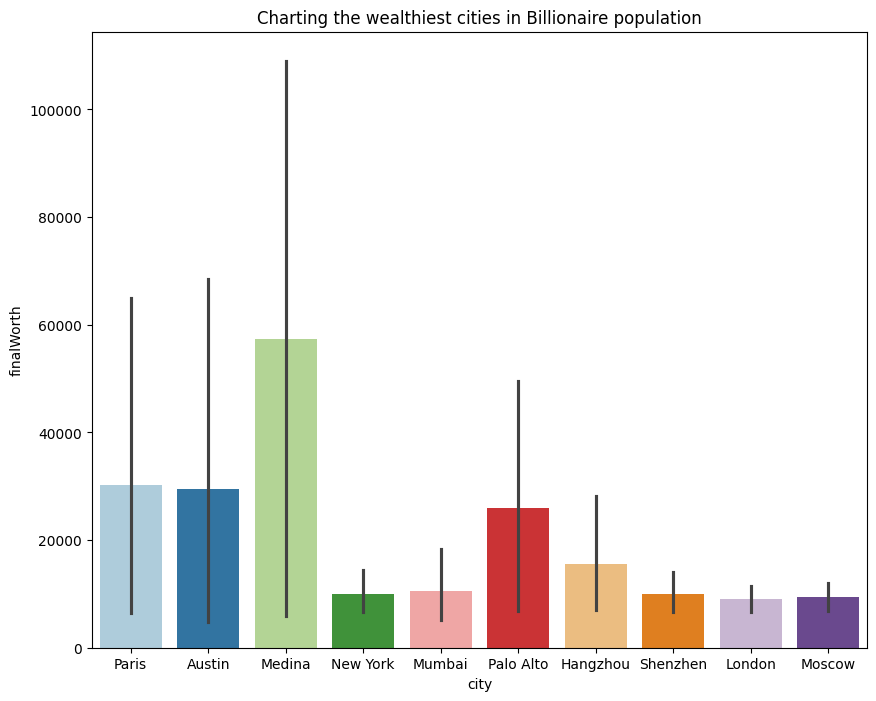

In [15]:
top_cities = df.groupby('city')['finalWorth'].sum().nlargest(10).index
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='finalWorth',data=df[df['city'].isin(top_cities)],palette='Paired')
plt.title('Charting the wealthiest cities in Billionaire population')
plt.show()

# Visualizing the geographical range of Billionaires worldwide.

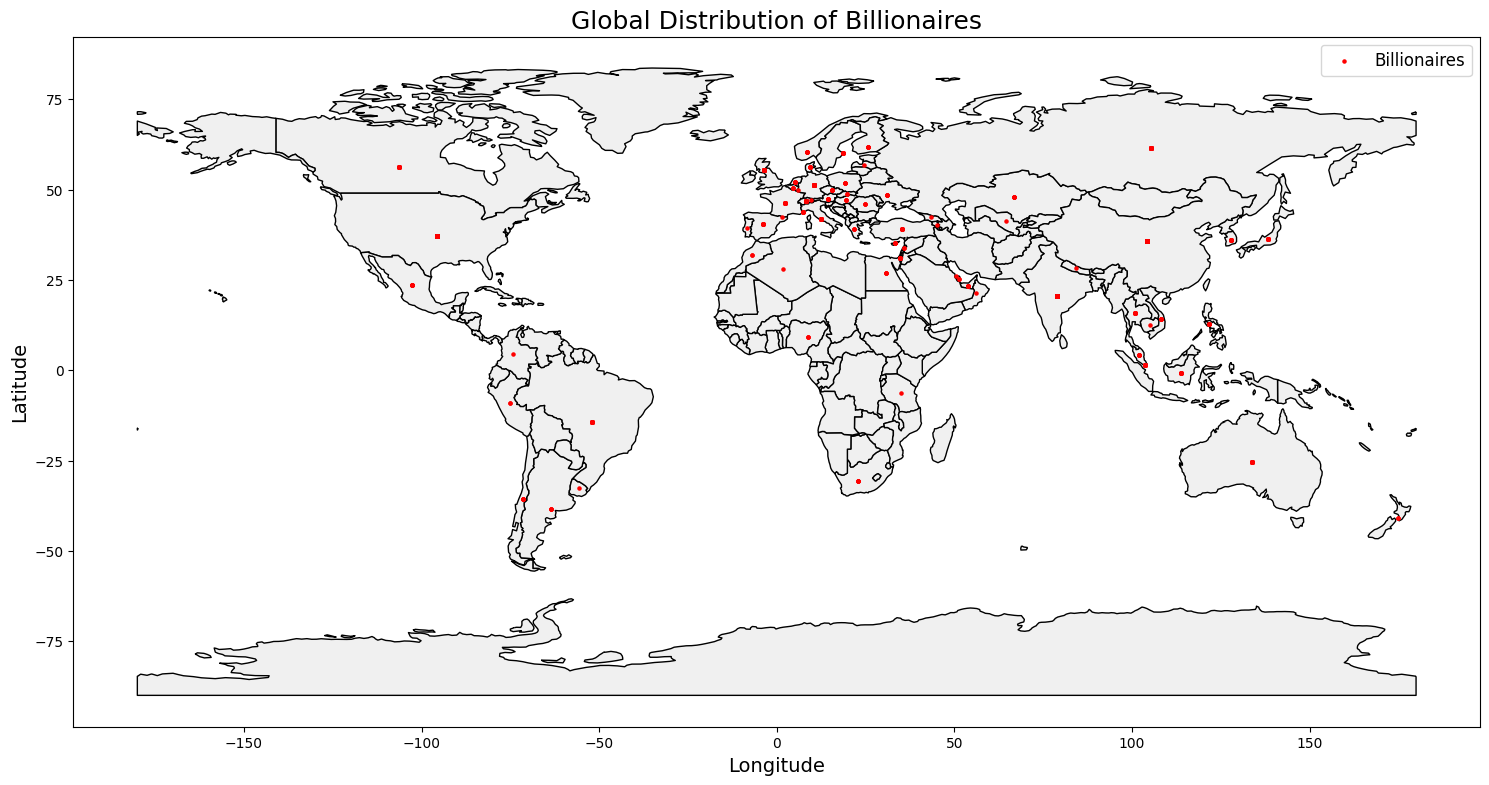

In [16]:
import geopandas as gpd

# Load the dataset using pandas
df = pd.read_csv('G:\\Project file\\Billionaires Statistics Dataset.csv', 
                 usecols=['longitude_country', 'latitude_country'])

# Convert latitude and longitude to Point geometries
geometry = gpd.points_from_xy(df['longitude_country'], df['latitude_country'])

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='#f0f0f0', edgecolor='k')
gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='Billionaires')

# Add title and legend
plt.title('Global Distribution of Billionaires', fontsize=18)
plt.legend(fontsize=12)

# Add labels to the axes
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()